In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

In [27]:
key_features = pd.read_csv("Data/key_features.csv")

In [28]:
key_features.head()

,Unnamed: 0.1,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,0,0,3217,/m/014hr,"['army', 'of', 'darkness']",1992,21502796.0,81.0,['United States of America'],horror,...,0,0,0,0,0,0,0,0,0.0,0.5
1,1,1,3947,/m/0191n,"['blue', 'velvet']",1986,8551228.0,120.0,['United States of America'],thriller,...,1,0,0,0,0,0,0,0,0.0,0.0
2,2,2,4231,/m/01cbx,"['buffy', 'the', 'vampire', 'slayer']",1992,16624456.0,86.0,['United States of America'],action,...,0,0,0,0,0,0,0,0,0.0,0.0
3,3,3,4728,/m/01hq1,"['batman', 'returns']",1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,...,1,0,0,0,0,0,0,0,0.0,0.0
4,4,4,5224,/m/01lsl,"['citizen', 'kane']",1941,1585634.0,119.0,['United States of America'],thriller,...,1,0,0,0,0,0,0,0,0.0,0.0


In [29]:
key_features.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID',
       'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue',
       'Movie_runtime', 'Movie_countries', 'Movie_main_genre',
       'Box_office_adjusted', 'Director', 'Audience_imdb_rating',
       'Audience_imdb_count', 'Budget', 'Character_in_title', 'Profit',
       'Budget_adjusted', 'Production Companies', 'Revenu_standardized',
       'Profit_standardized', 'imdb_rating_standardized', 'Success_indicator',
       'Actor_name', 'Freebase_character_ID', 'Famous_actors_count',
       'IsFamousStudio', 'IsFamousDirector', 'Budget_standardized',
       'Title_length', 'Title_characters', 'Nouns', 'Pronouns', 'Adjectives',
       'Verbs', 'Adverbs', 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY',
       'PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment'],
      dtype='object')

In [30]:
key_features_title = key_features[["Movie_name", "Success_indicator","Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY','PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

In [31]:
key_features_title

,Movie_name,Success_indicator,Title_length,Title_characters,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,"['army', 'of', 'darkness']",0.470781,3,16,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.500
1,"['blue', 'velvet']",0.551225,2,11,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
2,"['buffy', 'the', 'vampire', 'slayer']",-0.453017,4,24,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.000
3,"['batman', 'returns']",1.779560,2,14,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
4,"['citizen', 'kane']",0.825333,2,12,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,"['the', 'pact']",-0.527991,2,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000
2626,"['moonshine', 'county', 'express']",-0.493803,3,24,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
2627,"['trading', 'mom']",-0.708376,2,11,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.000
2628,"['the', 'man', 'behind', 'the', 'gun']",-0.435199,5,22,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.375


In [32]:
key_features_title["Success_indicator"] = np.floor(key_features_title["Success_indicator"]/100) +1

/tmp/ipykernel_126/3029668558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features_title["Success_indicator"] = np.floor(key_features_title["Success_indicator"]/100) +1


In [33]:
key_features_title["Success_indicator"] = key_features_title["Success_indicator"].astype("int64")

/tmp/ipykernel_126/3964037999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features_title["Success_indicator"] = key_features_title["Success_indicator"].astype("int64")


In [34]:
def normalize(x):
    return (x-np.mean(x))/np.std(x)

In [35]:
for i in key_features_title.columns:
    if i != "Movie_name":
        if i != "Success_indicator":
            key_features_title[i] = normalize(key_features_title[i])

/tmp/ipykernel_126/908036668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features_title[i] = normalize(key_features_title[i])


In [36]:
key_features_title["neg_sentiment"]

0       1.826629
1      -0.378345
2      -0.378345
3      -0.378345
4      -0.378345
          ...   
2625   -0.378345
2626   -0.378345
2627   -0.378345
2628    1.275385
2629   -0.378345
Name: neg_sentiment, Length: 2630, dtype: float64

In [37]:
# Load the data
X = key_features_title[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title['Success_indicator']

In [77]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [1,50]
precision_scores = []
recalls_scores = []


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=20, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=100, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=100, scoring="recall")
    recalls_scores.append(recall.mean())

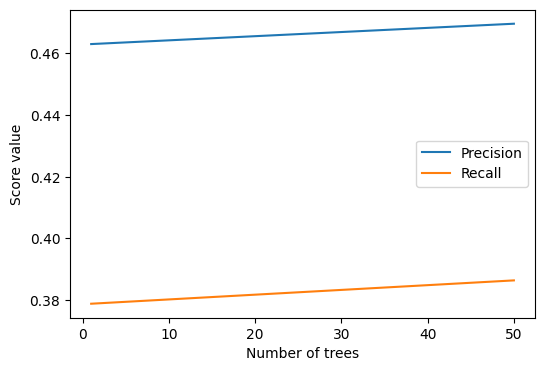

In [78]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()